## Predicting Customer Turnover in Telecom Company

In [106]:
import pandas as pd
import numpy as np
import seaborn as sn
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm
import scipy.stats as st
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

#### Data Prep
This data set is from Kaggle and is used to predict customer turnover. 

In [2]:
df = pd.read_csv('telecom.csv')

In [3]:
df.head(5)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
print(df.columns)

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')


In [5]:
remove = ['state','area code', 'phone number', 'account length']

In [6]:
df = df.drop(remove, axis = 1)

In [7]:
#Creating Dummy Variables
df2 = pd.get_dummies(df, drop_first = True)

In [8]:
print(df2.dtypes)

number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
international plan_yes      uint8
voice mail plan_yes         uint8
dtype: object


In [9]:
#Converting Churn type from Boolean to integer where False Becomes 0, anmd True becomes 1
df3 = df2.astype({"churn":'int64'})

In [84]:
df3

,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,international plan_yes,voice mail plan_yes
0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,0,1
1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,0,1
2,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0,0
3,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,1,0
4,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0,0,1
3329,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0,0,0
3330,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0,0,0
3331,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0,1,0


In [10]:
print(df3.dtypes)

number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                       int64
international plan_yes      uint8
voice mail plan_yes         uint8
dtype: object


In [11]:
df3.head(5)

,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,international plan_yes,voice mail plan_yes
0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,0,1
1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,0,1
2,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0,0
3,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,1,0
4,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,1,0


### Identify X & Y, and Logistic Regression using Statsmodels

In [12]:
target = ['churn']

In [13]:
#identify Y (Target) Variables and Response Variables (X)
y = df3[target]
X = df3.drop(target, axis = 1)

In [14]:
import statsmodels.api as sm
# Creating intercept term required for sm.Logit
X = sm.add_constant(X)

# Fit model
logit_model = sm.Logit(y, X)

#results of the fit
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.323896
         Iterations 7


In [15]:
#Looking at P-values in comparison to our target variables.
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                 3333
Model:                          Logit   Df Residuals:                     3316
Method:                           MLE   Df Model:                           16
Date:                Tue, 05 Jul 2022   Pseudo R-squ.:                  0.2172
Time:                        21:49:37   Log-Likelihood:                -1079.5
converged:                       True   LL-Null:                       -1379.1
Covariance Type:            nonrobust   LLR p-value:                3.381e-117
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -8.5682      0.711    -12.058      0.000      -9.961      -7.175
number vmail messages      0.0360      0.018      1.996      0.046       0.001       0.071
total day minutes         -0.2255      3.274     -0.069      0.945      -6.643       6.192
total day calls            0.0032      0.003      1.171      0.242      -0.002       0.009
total day charge           1.4027     19.260      0.073      0.942     -36.346      39.151
total eve minutes          0.7965      1.635      0.487      0.626      -2.408       4.001
total eve calls            0.0011      0.003      0.394      0.694      -0.004       0.007
total eve charge          -9.2859     19.237     -0.483      0.629     -46.990      28.419
total night minutes       -0.1244      0.876     -0.142      0.887      -1.842       1.593
total night calls          0.0007      0.003      0.235      0.814      -0.005       0.006
total night charge         2.8458     19.474      0.146      0.884     -35.322      41.014
total intl minutes        -4.3477      5.301     -0.820      0.412     -14.738       6.043
total intl calls          -0.0926      0.025     -3.699      0.000      -0.142      -0.044
total intl charge         16.4268     19.634      0.837      0.403     -22.055      54.908
customer service calls     0.5139      0.039     13.089      0.000       0.437       0.591
international plan_yes     2.0457      0.145     14.067      0.000       1.761       2.331
voice mail plan_yes       -2.0262      0.574     -3.527      0.000      -3.152      -0.900
==========================================================================================
"""

In [16]:
#These variables will be selected, as they have a P-Value P<= 0.05. 
#The rest have no statistical significance with response variable

cols = ['number vmail messages', 'total intl calls','customer service calls', 'international plan_yes', 
       'voice mail plan_yes']

In [17]:
#Re-running Logistic Regression with selected columns 
target = ['churn']
X = df3[cols]
y= df3[target]


# Creating intercept term required for sm.Logit
X = sm.add_constant(X)

# Fit model
logit_model = sm.Logit(y, X)

#results of the fit
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.357354
         Iterations 7


In [18]:
#Statistical information regarding confidence intervals, P-values and Odds Ration
params = np.exp(result.params)
conf = np.exp(result.conf_int())
conf['OR'] = params
pvalue=round(result.pvalues,3)
conf['pvalue']=pvalue
conf.columns = ['CI 95%(2.5%)', 'CI 95%(97.5%)', 'Odds Ratio','pvalue']
print ((conf))

                        CI 95%(2.5%)  CI 95%(97.5%)  Odds Ratio  pvalue
const                       0.071474       0.123442    0.093930   0.000
number vmail messages       0.999389       1.067332    1.032801   0.054
total intl calls            0.885699       0.971003    0.927371   0.001
customer service calls      1.447970       1.670960    1.555474   0.000
international plan_yes      5.469707       9.319230    7.139570   0.000
voice mail plan_yes         0.057695       0.468068    0.164333   0.001


###### Looking at Odds ratio, we see that International Plan, has an odds ratio greater than one. They are 7 times more likely to leave.
###### Also customers who have made customer service calls are 55% more likely to leave
###### Customers who make international calls are 8% less likely to leave, and customers who have a voicemail plan are 84% less likely to leave

### Creating Test Train Split

In [19]:
target = ['churn']
X = df3[cols]
y= df3[target]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=123)

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train.copy())
X_test = scaler.transform(X_test.copy())

In [22]:
X_train = pd.DataFrame(X_train, columns = X.columns)
X_test = pd.DataFrame(X_test, columns = X.columns)

### Fitting the Model

In [23]:
log = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear', random_state = 777)

In [24]:
#model_log = log.fit(X_train, y_train.values.ravel())
clf = log.fit(X,y.values.ravel())
#clf = log.fit(X,y)

In [25]:
clf.predict(X)

array([0, 0, 0, ..., 0, 0, 0])

In [26]:
clf.predict_proba(X)

array([[0.92815046, 0.07184954],
       [0.92578524, 0.07421476],
       [0.88978076, 0.11021924],
       ...,
       [0.90515193, 0.09484807],
       [0.90775062, 0.09224938],
       [0.95695496, 0.04304504]])

In [27]:
clf.score(X,y)

0.8583858385838584

### Drawing ROC Curve

In [28]:
from sklearn.metrics import roc_curve, auc

#Used to calculate the probability of scores of each of the datapoints
y_score = log.fit(X_train, y_train.values.ravel()).decision_function(X_test)


fpr, tpr, thresholds = roc_curve(y_test, y_score)

In [29]:
#calculating the AUC
print('AUC: {}'.format(auc(fpr, tpr)))

AUC: 0.7853725094388995


AUC: 0.7853725094388995


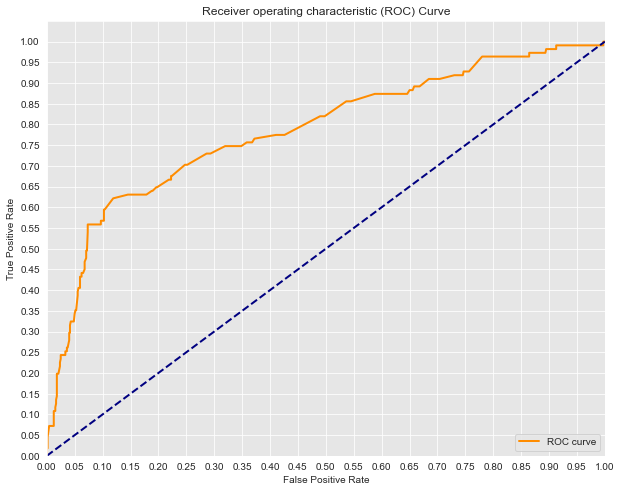

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

##### The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve. The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes. In This case our model has a score of 0.78/1.00 or 78%

### Confusion matrix for binary classification 

In [31]:
#predictions on Test set
predictions = log.predict(X_test)

In [32]:
#Calculating the accuracy score by comparing the actual values and predicted values.
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)

TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP+TN) /(TP+FP+TN+FN)

print('Accuracy of the binary classification = {:0.3f}'.format(accuracy))

True Positive(TP)  =  83
False Positive(FP) =  247
True Negative(TN)  =  476
False Negative(FN) =  28
Accuracy of the binary classification = 0.670


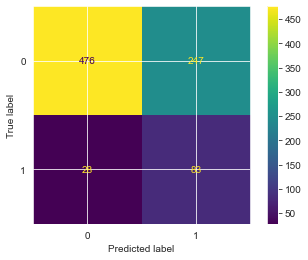

In [33]:
#Visual Representation of the Confusion Matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf,X_test,y_test)


In [108]:
#evaluation metrics of Logistic Regression Model
print (classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.94      0.66      0.78       723
           1       0.25      0.75      0.38       111

    accuracy                           0.67       834
   macro avg       0.60      0.70      0.58       834
weighted avg       0.85      0.67      0.72       834



#### The Confusion matrix performance on the Logistic Regresson classifier shows accuracy score of 67%

## KNN - K-NEAREST NEIGHBORS

In [34]:
knn_clf = KNeighborsClassifier()

### KNN with GridSearch

In [35]:
knn_grid = {
    'n_neighbors':[1,2,3,4,5,6,7,8]
}

In [36]:
knn = GridSearchCV(knn_clf, knn_grid, scoring = 'accuracy', cv = 3 )

In [37]:
knn.fit(X,y.values.ravel())

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8]},
             scoring='accuracy')

In [38]:
knn.best_params_

{'n_neighbors': 4}

In [39]:
#Updating classifier with best paramters
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(X,y.values.ravel())

KNeighborsClassifier(n_neighbors=4)

In [40]:
knn_prediction = knn.predict(X_test)

In [41]:
print('Prediction: {}'.format(knn_prediction))

Prediction: [1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1
 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 

In [42]:
knn.score(X_test,y_test)

0.8669064748201439

In [43]:
# Evaluating KNN Algorithm
print(confusion_matrix(y_test,knn_prediction))


TN, FP, FN, TP = confusion_matrix(y_test, knn_prediction).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP+TN) /(TP+FP+TN+FN)

print('Accuracy of the binary classification = {:0.3f}'.format(accuracy))

[[682  41]
 [ 70  41]]
True Positive(TP)  =  41
False Positive(FP) =  41
True Negative(TN)  =  682
False Negative(FN) =  70
Accuracy of the binary classification = 0.867


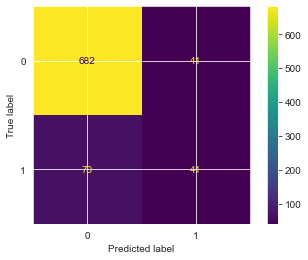

In [44]:
plot_confusion_matrix(knn,X_test,y_test)

In [45]:
print (classification_report(y_test, knn_prediction))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92       723
           1       0.50      0.37      0.42       111

    accuracy                           0.87       834
   macro avg       0.70      0.66      0.67       834
weighted avg       0.85      0.87      0.86       834



## DECISION TREE ALGORITHM

In [46]:
dt_clf = DecisionTreeClassifier()

In [47]:
#Parameters for GridSearchCV
dt_grid = {'criterion': ['gini', 'entropy'],
    'max_depth': [2, 5, 10],
    'min_samples_split': [2, 5, 10, 20]}

In [48]:
dt = GridSearchCV(dt_clf, dt_grid, scoring = 'accuracy', cv = 3 )

In [49]:
dt.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 5, 10],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='accuracy')

In [50]:
dt.best_params_

{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 5}

In [51]:
dt = DecisionTreeClassifier(criterion= 'gini', max_depth= 10, min_samples_split= 10)

In [52]:
dt.fit(X,y.values.ravel())

DecisionTreeClassifier(max_depth=10, min_samples_split=10)

In [53]:
dt.score(X_test,y_test)

0.86810551558753

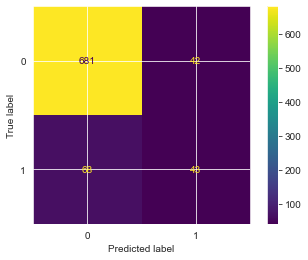

In [54]:
dt_prediction = dt.predict(X_test)
plot_confusion_matrix(dt,X_test,y_test)

In [55]:
print(confusion_matrix(y_test,dt_prediction))


TN, FP, FN, TP = confusion_matrix(y_test, dt_prediction).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP+TN) /(TP+FP+TN+FN)

print('Accuracy of the binary classification = {:0.3f}'.format(accuracy))

[[681  42]
 [ 68  43]]
True Positive(TP)  =  43
False Positive(FP) =  42
True Negative(TN)  =  681
False Negative(FN) =  68
Accuracy of the binary classification = 0.868


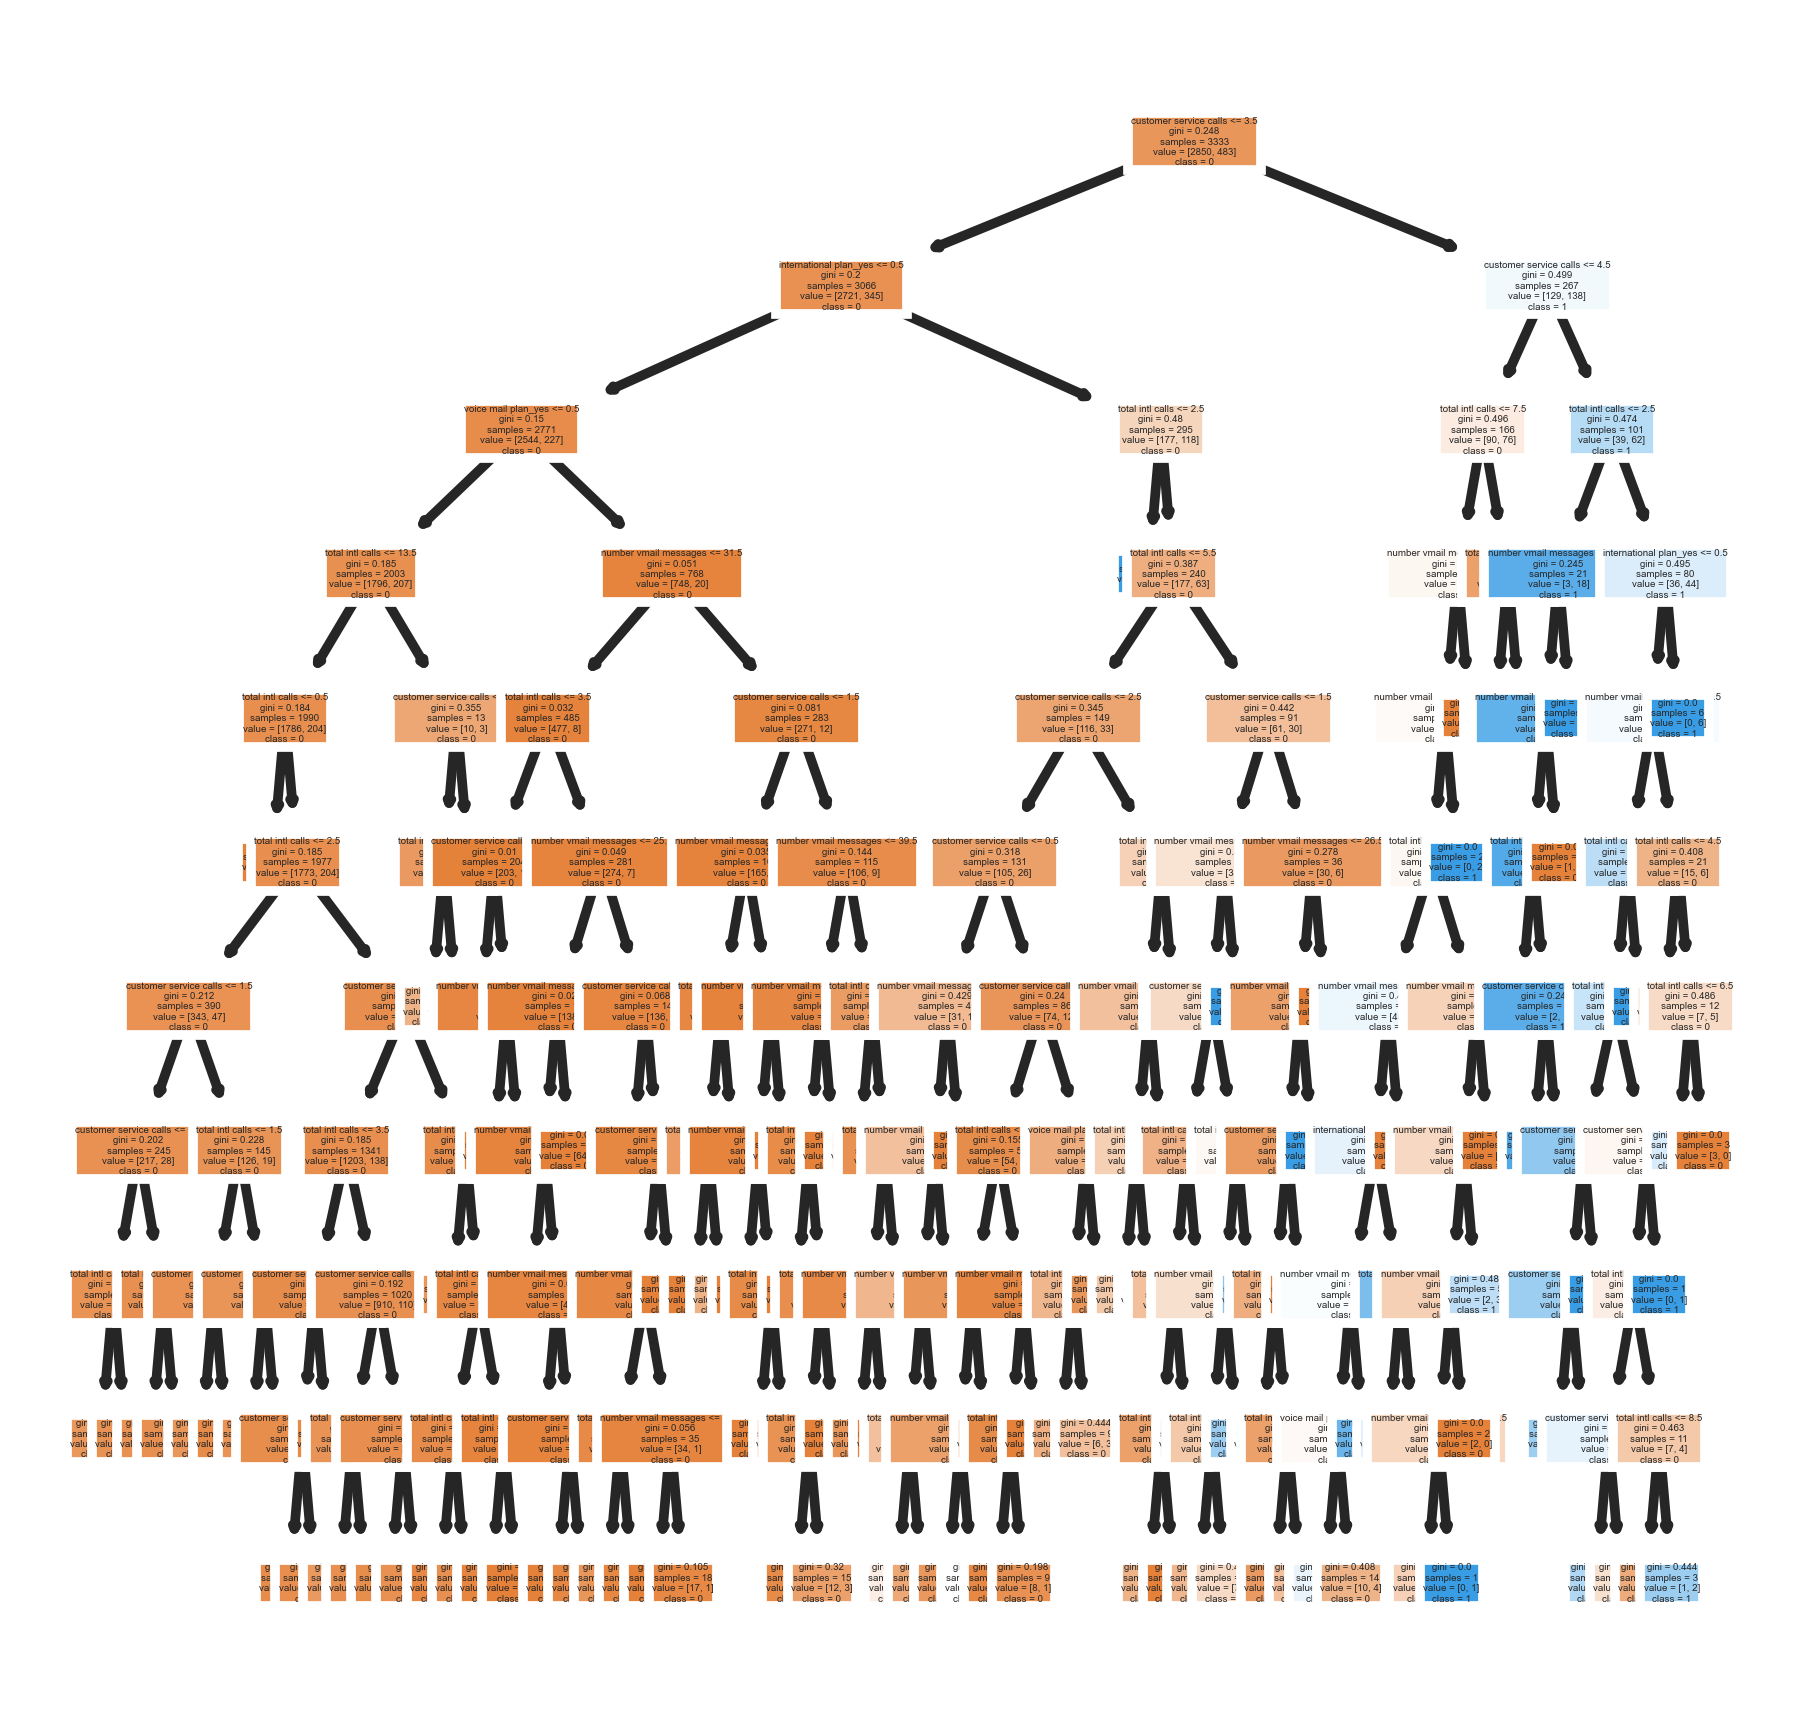

In [114]:
#Visualization of Decision Tree
from sklearn import tree

fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (3,3), dpi=700)
tree.plot_tree(dt,
               feature_names = X_train.columns, 
               class_names=np.unique(y).astype('str'),
               filled = True)
plt.show()

#### Feature Importance using Decison Trees

In [57]:
dt.feature_importances_

array([0.07993061, 0.29281168, 0.3727096 , 0.22270342, 0.03184469])

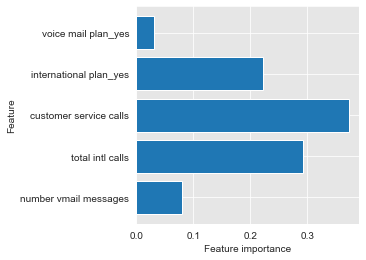

In [59]:
#Visualization of feature importances
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(4,4))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(dt)

#### Simply Put, the larger the value the more important the feature.  Recall earlier, that customers who have made customer service calls are 55% more likely to leave.

In [112]:
print(classification_report(y_test, dt_prediction))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93       723
           1       0.51      0.39      0.44       111

    accuracy                           0.87       834
   macro avg       0.71      0.66      0.68       834
weighted avg       0.86      0.87      0.86       834



### Random Forests Model

In [61]:
rf_clf = RandomForestClassifier()

In [63]:
rf_grid = {'n_estimators': [10,20,30,40,50,60,70,80,90,100],
    'max_depth': [1,2,3,4,5],}

In [64]:
rf = GridSearchCV(rf_clf, rf_grid, scoring = 'accuracy', cv = 3 )

In [66]:
rf.fit(X,y.values.ravel())

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100]},
             scoring='accuracy')

In [67]:
rf.best_params_

{'max_depth': 4, 'n_estimators': 90}

In [68]:
rf = RandomForestClassifier(max_depth = 4, n_estimators = 90, random_state = 123)

In [69]:
rf.fit(X,y.values.ravel())

RandomForestClassifier(max_depth=4, n_estimators=90, random_state=123)

In [73]:
rf.score(X,y)

0.8847884788478848

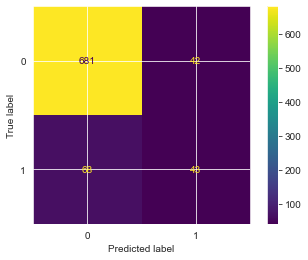

In [75]:
rf_prediction = rf.predict(X_test)

plot_confusion_matrix(dt,X_test,y_test)

In [76]:
TN, FP, FN, TP = confusion_matrix(y_test, rf_prediction).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP+TN) /(TP+FP+TN+FN)

print('Accuracy of the binary classification = {:0.3f}'.format(accuracy))

True Positive(TP)  =  41
False Positive(FP) =  41
True Negative(TN)  =  682
False Negative(FN) =  70
Accuracy of the binary classification = 0.867


In [111]:
print(classification_report(y_test, rf_prediction))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92       723
           1       0.50      0.37      0.42       111

    accuracy                           0.87       834
   macro avg       0.70      0.66      0.67       834
weighted avg       0.85      0.87      0.86       834



## Summary of findings

Looking at Odds ratio, we see that International Plan, has an odds ratio greater than one. They are 7 times more likely to leave.

Also customers who have made customer service calls are 55% more likely to leave.

Customers who make international calls are 8% less likely to leave, and customers who have a voicemail plan are 84% less likely to leave

For Logistic Regression, the model had an accuracy score of 0.67

For KNN, the model had an accuracy score of 0.867

For Decision Trees, the model had an accuracy score of 0.868

For Random Forests, the model had an accuracy score of 0.867

For Logistic Regression, The area under the ROC Curve, is 78.5

Plotting feature importances, using Decision Trees. customer services calls and then total international calls were top two important features
